## Assignment 1 - 220197E (Gunathilaka K L)


### Q1 

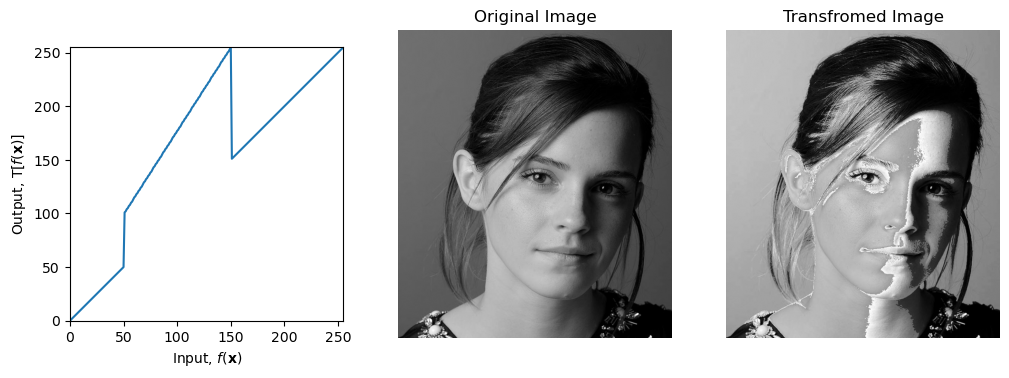

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0), (50, 50), (50, 101), (150, 255), (150, 151), (255, 255)])

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

#print(transform)
f = cv.imread("a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
g = cv.LUT(f, transform)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$');
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(g, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Transfromed Image'); 
ax[2].axis("off")
plt.show()

### Q2 i

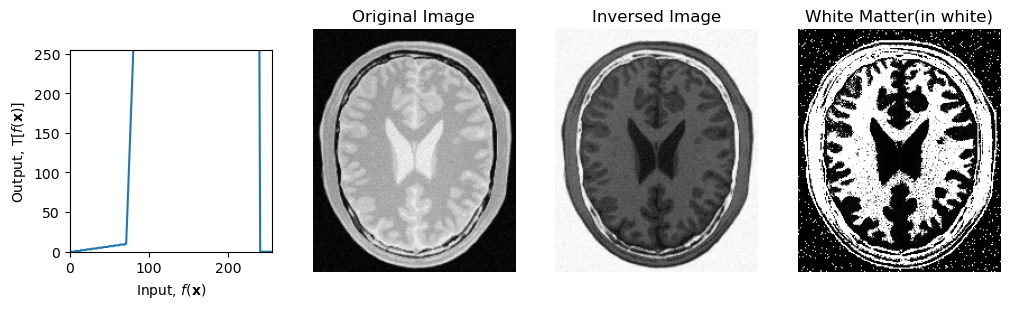

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0), (70,10), (80,255) , (238, 255),(239, 0) ,(255,0)])
inverse = np.arange(255, -1, -1, dtype=np.uint8)

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

f = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
inv = cv.LUT(f, inverse)
g = cv.LUT(inv, transform)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(inv, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Inversed Image'); #so white is lighter 
ax[2].axis("off")
ax[3].imshow(g, cmap='gray', vmin=0, vmax=255);ax[3].set_title('White Matter(in white)')
ax[3].axis("off")
plt.show()

### Q2 ii)

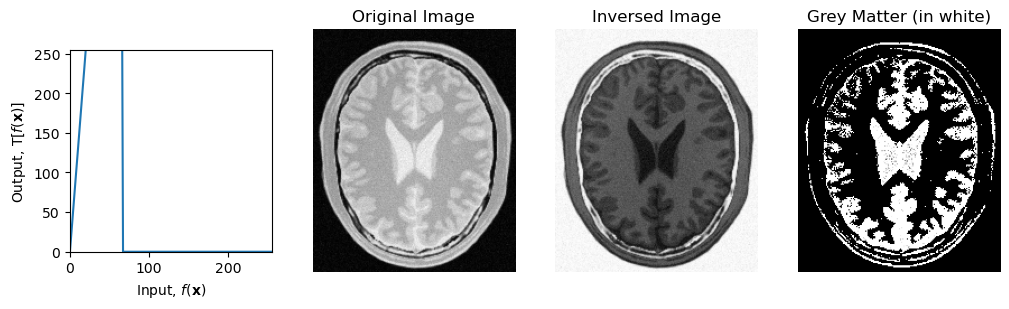

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = []

c = np.array([(-1,0),(20, 255) ,  (65,255), (66,0) ,(255,0)])
inverse = np.arange(255, -1, -1, dtype=np.uint8)

for i in range(len(c)-1): #constructing the transform using the intensity function's indices
    t_temp = np.linspace(c[i,1], c[i+1, 1], c[i+1,0] -  c[i,0]).astype('uint8')
    transform = np.concatenate((transform, t_temp), axis=0).astype('uint8')

f = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
inv = cv.LUT(f, inverse)
g = cv.LUT(inv, transform)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].plot(transform)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0,255);ax[0].set_ylim(0,255);ax[0].set_aspect('equal')

ax[1].imshow(f, cmap='gray', vmin=0, vmax=255);ax[1].set_title('Original Image'); 
ax[1].axis("off")
ax[2].imshow(inv, cmap='gray', vmin=0, vmax=255);ax[2].set_title('Inversed Image'); #so white is lighter 
ax[2].axis("off")
ax[3].imshow(g, cmap='gray', vmin=0, vmax=255);ax[3].set_title('Grey Matter (in white)')
ax[3].axis("off")
plt.show()

### Q3 

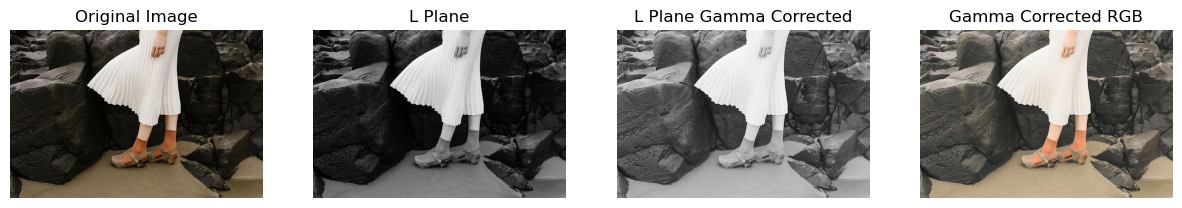

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.47

bgr = cv.imread('a1images/highlights_and_shadows.jpg')
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
lab = cv.cvtColor(rgb, cv.COLOR_RGB2LAB)
lplane = lab[:, :, 0]

t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(lplane, t)

fig, ax = plt.subplots(1, 4, figsize=(15, 8))
ax[0].imshow(rgb)
ax[0].set_title('Original Image')
ax[1].imshow(lplane, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('L Plane')
ax[2].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('L Plane Gamma Corrected')

lab[:, :, 0] = g
ax[3].imshow(cv.cvtColor(lab, cv.COLOR_LAB2RGB))
ax[3].set_title('Gamma Corrected RGB')
for a in ax:
    a.axis('off')
plt.show()